# Assignment 5 on MLflow
**Note**: It is recommended to use a virtual environment to run the same. Requirements can be found in the `requirements.txt` file. <br>
**Tip**: Refer to the [following blog](https://anbasile.github.io/posts/2017-06-25-jupyter-venv/) to learn more about using virtual environments and corresponding kernels in VSCode

In [20]:
# !pip install plot_keras_history
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from plot_keras_history import show_history

## Getting the data

In [21]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

(60000, 784) train input samples
(10000, 784) test input samples


In [22]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


## Run a simple model to check if Keras is working properly

In [23]:
# let's try a basic neural network for digit classification
model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


2024/04/21 09:26:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c589ba549e54457d826849b0fd7eef17', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6106 - loss: 1.4855 - val_accuracy: 0.8924 - val_loss: 0.4077
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8995 - loss: 0.3701 - val_accuracy: 0.9164 - val_loss: 0.2915
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9182 - loss: 0.2862 - val_accuracy: 0.9285 - val_loss: 0.2484


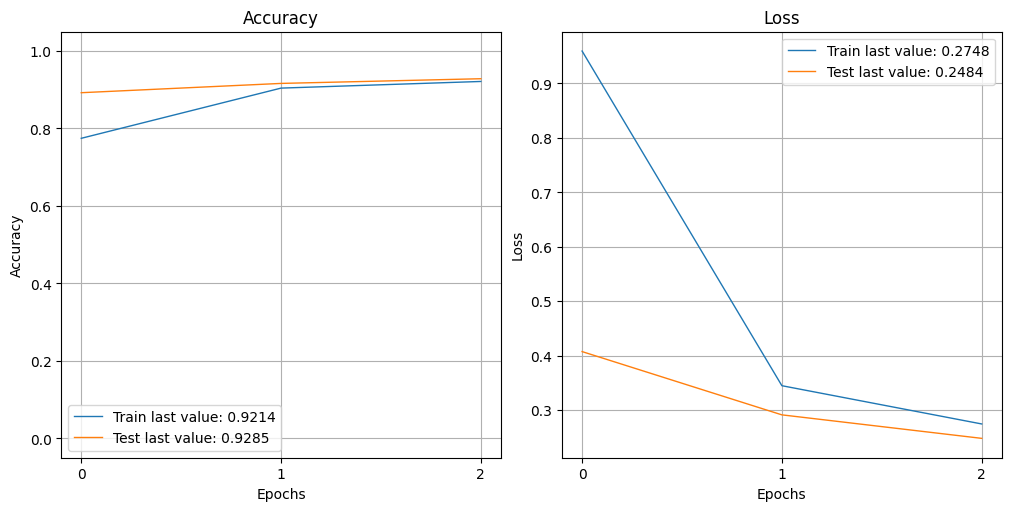

In [25]:
show_history(history)

In [26]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - 3ms/step - accuracy: 0.9285 - loss: 0.2484
Test accuracy: 92.85%


In [ ]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Predicted Digit: 3


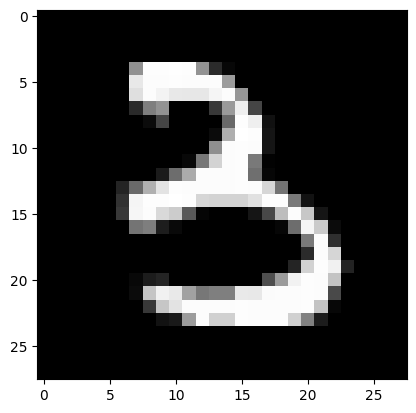

In [ ]:
# check if the prediction is working fine for a random test point
test_pt = 782
plt.imshow(X_test[test_pt], cmap=plt.get_cmap('gray'))
probs = model.predict(x_test[test_pt:test_pt+1], verbose=True)
print("Predicted Digit:", np.argmax(probs))

# Define all the experiment variants

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py


class define_expt_variants:
    """
    Class which holds all the 10 required experimental variants
    Each variant differs by a minor configuation such as learning rates, model size, batch size etc.
    Each class method fits the model on the data and captures the history. However, the history is not returned
    """
    def __init__(self):
        pass

    def cfg_basic(self):
        """basic neural network for digit classification"""
        model_1 = keras.Sequential()
        model_1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_1.add(layers.Dense(20, activation='sigmoid'))
        model_1.add(layers.Dense(10, activation='softmax'))

        model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_1
    
    def cfg_bigger(self):
        """bigger model"""
        model_2 = keras.Sequential()
        model_2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_2.add(layers.Dense(128, activation='sigmoid'))
        model_2.add(layers.Dense(10, activation='softmax'))

        model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_2
    
    def cfg_regularised(self):
        """regularised model"""
        model_3 = keras.Sequential()
        model_3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(10, activation='softmax'))

        model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_3.fit(x_train, y_train, epochs=50, steps_per_epoch=50, validation_data=(x_test, y_test))

        return model_3
    
    def cfg_dropout(self):
        """model with dropout"""
        model_4 = keras.Sequential()
        model_4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_4.add(Dropout(0.7))
        model_4.add(layers.Dense(128, activation='sigmoid'))
        model_4.add(Dropout(0.6))
        model_4.add(layers.Dense(10, activation='softmax'))

        model_4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_4.fit(x_train, y_train, epochs=10)

        return model_4
    
    def cfg_early_stop(self):
        """model with early stopping callback"""
        model_5 = keras.Sequential()
        model_5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_5.add(layers.Dense(128, activation='sigmoid'))
        model_5.add(layers.Dense(10, activation='softmax'))
        model_5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
        # model_ will get saved at the end of every epoch automatically.
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.keras")
        history = model_5.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])
        
        return model_5
    

    def cfg_lr_10(self):
        """model with a very high learning rate"""
        model_6 = keras.Sequential()
        model_6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_6.add(layers.Dense(10, activation='sigmoid'))
        model_6.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=10.0)
        model_6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_6.fit(x_train, y_train, epochs=20)

        return model_6
    
    def cfg_lr_1e_5(self):
        """model with very low learning rate"""
        model_7 = keras.Sequential()
        model_7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_7.add(layers.Dense(10, activation='sigmoid'))
        model_7.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=.00001)
        model_7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_7.fit(x_train, y_train, epochs=20)

        return model_7
    
    def cfg_lr_1e_2(self):
        """model with optimal learning rate"""
        model_8 = keras.Sequential()
        model_8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_8.add(layers.Dense(10, activation='sigmoid'))
        model_8.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01)
        model_8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_8.fit(x_train, y_train, epochs=20)

        return model_8
    
    def cfg_lr_momentum(self):
        """model with momentum in the optimizer"""
        model_9 = keras.Sequential()
        model_9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_9.add(layers.Dense(10, activation='sigmoid'))
        model_9.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_9.fit(x_train, y_train, epochs=20)

        return model_9
    
    def cfg_minibatch_sgd(self):
        """Mini-batch SGD - the default minibatch size is 32 unlike 1"""
        model_10 = keras.Sequential()
        model_10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_10.add(layers.Dense(10, activation='sigmoid'))
        model_10.add(layers.Dense(10, activation='softmax'))
        
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_10.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_10.fit(x_train, y_train, batch_size=512, epochs=10)

        return model_10


In [ ]:
# expts = define_expt_variants()
# model_t= expts.cfg_basic()

# Use MLflow experiments
Run the command `mlflow server` in the terminal if you get a Connection Refused Error

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

# Set the tracking URI for MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Run the command `mlflow server` in the terminal if you get a connection refused error

# Start the parent experiment
parent_experiment = mlflow.set_experiment("A05 MNIST Experiment")


# we let the run_name to be randomly chosen, so that a new 
# entry is created as the parent experiment (a new row is created with each run of the cell)
# all children experiments are nested
with mlflow.start_run(experiment_id=parent_experiment.experiment_id, 
                    #   run_name="MNIST Parent Run"
                      ):

    # Create an instance of the ModelConfigurations class
    model_configs = define_expt_variants()

    # Get the list of configuration methods from the class
    # all the useful methods were defined such that they start
    # with the string 'cfg'
    config_methods = [getattr(model_configs, method_name) for method_name in dir(model_configs) 
                      if callable(getattr(model_configs, method_name)) 
                      and method_name.startswith('cfg')]

    # config_methods = config_methods[4:]

    # Code for running the 10 model configurations
    for i, config_method in enumerate(config_methods, start=1):

        # name of the nested run is extracted by config_method.__name__
        with mlflow.start_run(run_name=f"MNIST Config {config_method.__name__}", nested=True):
            
            # Print run name
            print(f'run name = {config_method.__name__}')

            # autologging - we use it to log other params 
            # which we aren't manually logging
            mlflow.autolog()
            
            # the method is defined such that it fits the model on the data
            model = config_method()

            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
            train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)

            # Assemble the metrics and log to mlflow
            metrics = {
              "test_loss": test_loss, 
              "test_acc": test_acc, 
              "train_loss": train_loss, 
              "train_acc": train_acc
            }            
            mlflow.log_metrics(metrics)
            print(f'metrics are {metrics}')

            # Assemble the parameters and log to mlflow
            params = {
              'lr_mlflow_param_custom': model.optimizer.learning_rate.numpy(),
              'momentum_mlflow_param_custom': model.optimizer.momentum, 
              'optimiser_param_custom': model.optimizer.__class__.__name__
            } 
            mlflow.log_params(params)
            print(f'params are {params}')

2024/04/21 09:12:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:12:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_10


c:\Users\Admin\OneDrive - smail.iitm.ac.in\Stdy\Sem 10\CS5830 Big Data Lab\A05_MLFlow\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2134 - loss: 2.2106
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7518 - loss: 0.8508
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8405 - loss: 0.6025
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8624 - loss: 0.5076
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8781 - loss: 0.4665
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.4704
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8846 - loss: 0.4344
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8881 - loss: 0.4235
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8970 - loss: 0.4024
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8942 - loss: 0.4043
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8976 - loss: 0.3969
Epoch 12/20
1875/1875 ━━━━━

2024/04/21 09:15:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:15:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_1e_2


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1544 - loss: 2.3192
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3143 - loss: 2.1708
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3957 - loss: 1.9074
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4854 - loss: 1.5931
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5561 - loss: 1.3670
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6047 - loss: 1.2167
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6504 - loss: 1.0987
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7115 - loss: 0.9903
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7494 - loss: 0.8886
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7714 - loss: 0.8108
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7948 - loss: 0.7386
Epoch 12/20
1875/1875 ━━━━━━━━

2024/04/21 09:17:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:17:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_1e_5


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3712
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 2.3708
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0989 - loss: 2.3681
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0986 - loss: 2.3679
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0989 - loss: 2.3684
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 2.3678
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3673
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0999 - loss: 2.3612
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0999 - loss: 2.3621
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0975 - loss: 2.3643
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0964 - loss: 2.3622
Epoch 12/20
1875/1875 ━━━━━━━━

2024/04/21 09:19:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:19:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_momentum


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2523 - loss: 2.2053
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5903 - loss: 1.6077
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7166 - loss: 1.1162
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7819 - loss: 0.8627
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8224 - loss: 0.7090
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8469 - loss: 0.6021
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8618 - loss: 0.5373
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8754 - loss: 0.4814
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8834 - loss: 0.4480
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8923 - loss: 0.4136
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8996 - loss: 0.3823
Epoch 12/20
1875/1875 ━━━━━━━━

2024/04/21 09:21:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:21:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_minibatch_sgd


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0953 - loss: 2.3305
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0973 - loss: 2.3005
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1589 - loss: 2.2898
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1321 - loss: 2.2818
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1620 - loss: 2.2744
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1764 - loss: 2.2655
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2428 - loss: 2.2563
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2928 - loss: 2.2467
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3224 - loss: 2.2348
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3553 - loss: 2.2208
313/313 - 1s - 4ms/step - accuracy: 0.3861 - loss: 2.2073
1875/1875 - 4s - 2ms/step - accuracy: 0.3787 - loss: 2.2095
metrics are {'test_lo

2024/04/21 09:22:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:22:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_regularised


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.2960 - loss: 5.7732 - val_accuracy: 0.5275 - val_loss: 2.8453
Epoch 2/50


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5275 - val_loss: 2.8453
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5496 - loss: 2.5451 - val_accuracy: 0.6507 - val_loss: 2.0154
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6507 - val_loss: 2.0154
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6190 - loss: 1.9697 - val_accuracy: 0.6050 - val_loss: 1.8293
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6050 - val_loss: 1.8293
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6538 - loss: 1.8009 - val_accuracy: 0.7010 - val_loss: 1.7146
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7010 - val_loss: 1.7146
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6843 - loss: 1.7182 - val

## Search through Nested Runs

In [ ]:

# Get the experiment ID of the parent experiment
experiment_id = parent_experiment.experiment_id

# Get the MlflowClient
client = MlflowClient()

# Get the child runs from the parent run
child_runs = client.search_runs(experiment_ids = experiment_id)

# Show only two child runs and only some metrics/params for example purpose
child_runs = child_runs[:2]
for child_run in child_runs:
    print(f"Child Run Name: {child_run.data.tags.get('mlflow.runName')}")
    print(f"\t ID: {child_run.info.run_id}")
    print(f"\t loss = {child_run.data.metrics['loss']}, epochs = {child_run.data.params['epochs']}")

Child Run Name: MNIST Config cfg_regularised
	 ID: 92cddd6f127c41aabe8ae0ccd7890c79
	 loss = 0.0, epochs = 50
Child Run Name: MNIST Config cfg_minibatch_sgd
	 ID: 38fa0b10806b4e7d9c6a616124339b63
	 loss = 2.21730899810791, epochs = 10
